## Melanie Schwartz (sno122)
DS 4033
Dr. Acosta
4/24/2024


Read the data into a dataframe df, store the column Status into a new dataframe (or np array), then remove this column from df. It is of interest to know which variables are useful to identify if a bank note is counterfeit. We hope that finding principal components and a biplot may help. To this end, scale by the data by substracting the mean and dividing by the standard deviation all the columns in df.

In [196]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [197]:
# Load CSV
file_path = 'bank.csv'
data = pd.read_csv(file_path)

In [198]:
"""
1. (20 pts.) Find all six principal components from df. 
Display a scatterplot of PC1 and PC2 values.
"""
# Separate the 'Status' column into a new DF 
# remove it from the original DF
status = data['Status']
df = data.drop('Status', axis=1)

In [199]:
# Scale the data by subtracting the mean 
# and dividing by the standard deviation
df_scaled = (df - df.mean()) / df.std()

In [200]:
# Perform PCA
pca = PCA(n_components=6)
principal_components = pca.fit_transform(df_scaled)

In [201]:
# Create a DF for the PC
pc_df = pd.DataFrame(data=principal_components, 
                     columns=['PC1', 'PC2', 
                              'PC3', 'PC4', 
                              'PC5', 'PC6'])

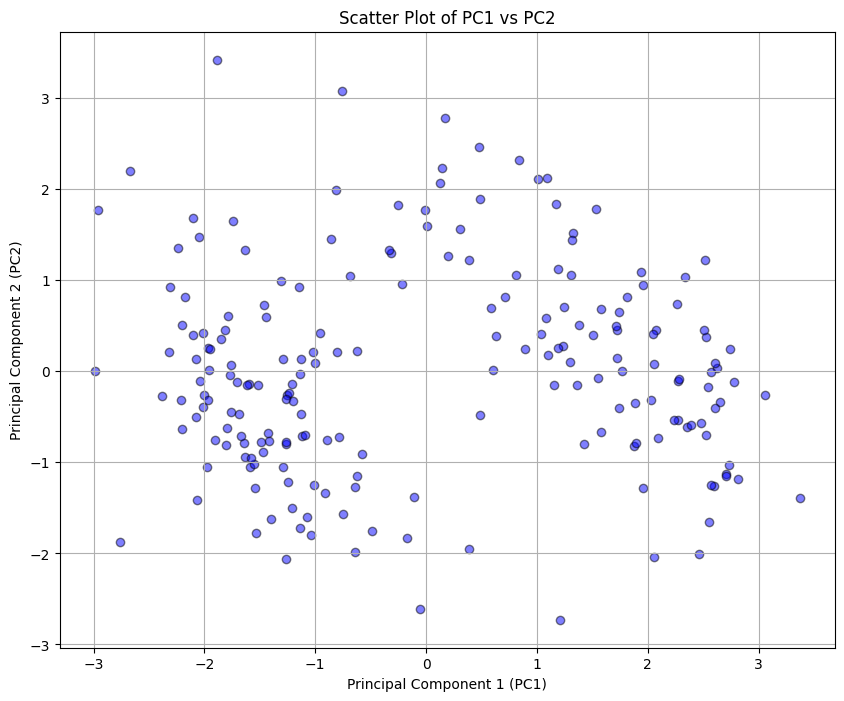

In [202]:
# Plotting scatterplot of PC1 and PC2
plt.figure(figsize=(10, 8))
plt.scatter(pc_df['PC1'], pc_df['PC2'], c='blue',
            edgecolor='black', alpha=0.5)

plt.title('Scatter Plot of PC1 vs PC2')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.show()

In [203]:
"""
2. (20 pts.) Find the eigenvalues and show the 
rotation matrix of all six principal components. 
Find their PVE. How much variance is explained by 
P C1 and P C2?
"""
# Eigenvalues of the PCA components
eigenvalues = pca.explained_variance_

In [204]:
# Rotation matrix (e vectors of 
# the covariance matrix)
matrix = pca.components_

In [205]:
# PVE
# by each component
pve = pca.explained_variance_ratio_

In [206]:
# Sum of variance explained 
# by PC1 and PC2
variance = pve[0] + pve[1]

# Printing outputs
print("Eigenvalues:", eigenvalues)

Eigenvalues: [2.9455582  1.27808378 0.86903255 0.44976868 0.2686769  0.18887988]


In [207]:
print("Rotation Matrix:\n", matrix)

Rotation Matrix:
 [[ 0.00698703 -0.46775816 -0.4866787  -0.40675833 -0.36789112  0.49345832]
 [ 0.81549497  0.34196711  0.2524586  -0.26622878 -0.09148667  0.27394074]
 [-0.01768066  0.10338286  0.12347472  0.58353831 -0.78757147  0.11387536]
 [-0.57461728  0.39492254  0.43027826 -0.40367354 -0.11022672  0.39193052]
 [-0.0587961   0.63949612 -0.61409716 -0.21547564 -0.21984942 -0.3401601 ]
 [ 0.03105698 -0.29774768  0.34915294 -0.46235361 -0.41896754 -0.63179849]]


In [208]:
print("Proportion of Variance Explained:", pve)

Proportion of Variance Explained: [0.49092637 0.21301396 0.14483876 0.07496145 0.04477948 0.03147998]


In [209]:
print("Variance explained by PC1 and PC2:", variance)

Variance explained by PC1 and PC2: 0.7039403303350013


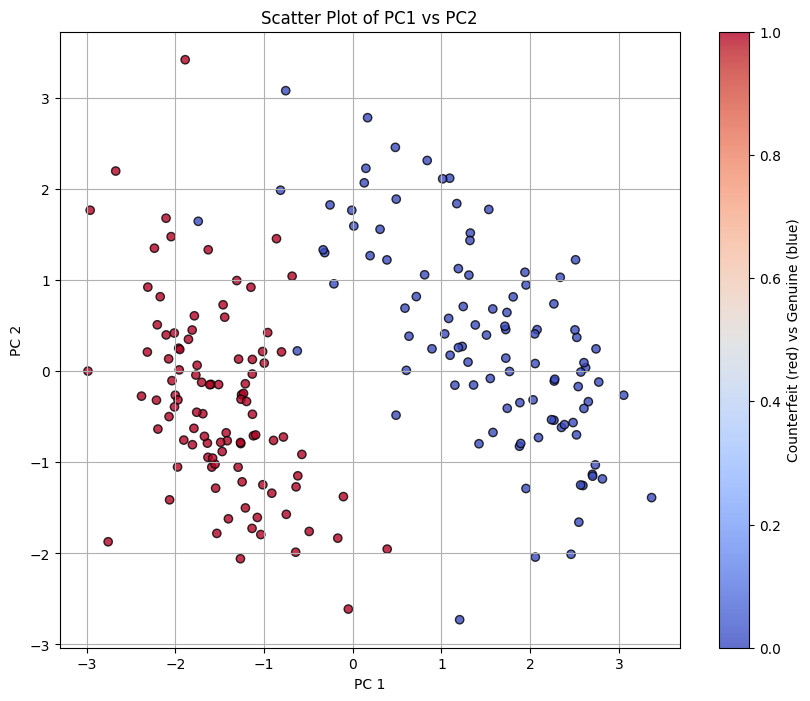

In [210]:
"""
3. (20 pts.) Display again the scatterplot of 
PC1 and PC2 values. Each dot represents a bank note, 
so use Status to display in red the counterfeit bank notes.
"""
# Plotting the scatter plot of 
# PC1 and PC2 with counterfeit notes highlighted
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], 
            principal_components[:, 1], alpha=0.8,
            c=(status != 'genuine'), 
            cmap='coolwarm', edgecolors='k', label='Counterfeit')

plt.title('Scatter Plot of PC1 vs PC2')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Counterfeit (red) vs Genuine (blue)')
plt.grid(True)
plt.show()

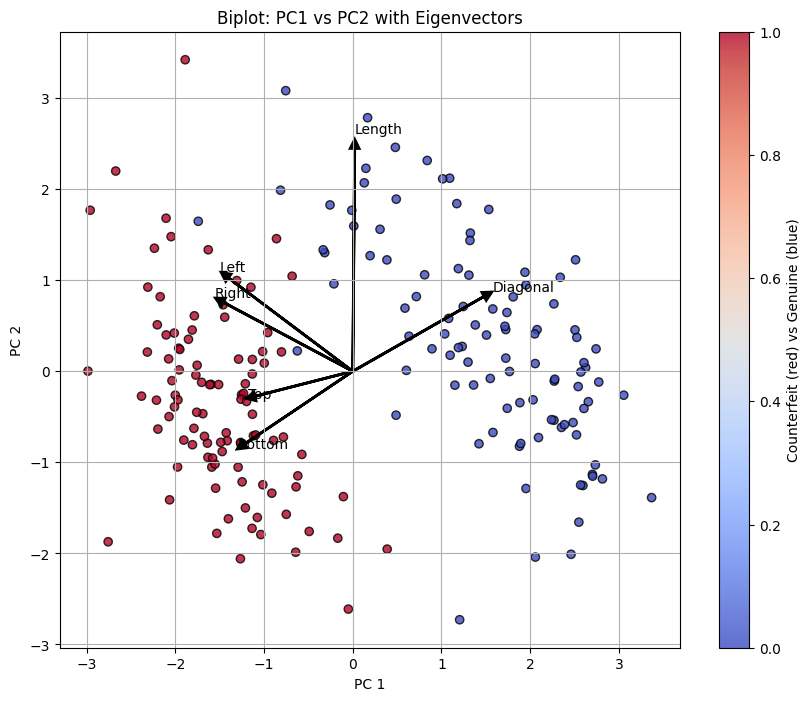

In [211]:
"""
4. (20 pts.) Display the eigenvectors or loading vectors 
(your choice) on top of the scatterplot from previous
question. The result is a biplot.
"""
# Biplot with loading vectors on top of the scatter plot 
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], 
            principal_components[:, 1], alpha=0.8,
            c=(status != 'genuine'), 
            cmap='coolwarm', edgecolors='k', label='Counterfeit')

# Add the loading vectors
feature_names = df.columns
for i, v in enumerate(pca.components_[0:2, :].T): 
    plt.arrow(0, 0, v[0] * 3, v[1] * 3,
              head_width=0.1, head_length=0.1, 
              linewidth=2, color='black')
    
    plt.text(v[0] * 3.2, v[1] * 3.2, feature_names[i], color='black')

plt.title('Biplot: PC1 vs PC2 with Eigenvectors')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Counterfeit (red) vs Genuine (blue)')
plt.grid(True)
plt.show()

In [212]:
"""
5. (20 pts.) Which variable is most 
useful to identify counterfeit bank notes?
"""
# Calculate the combined scores for the first two PC
scores_pc1 = np.abs(pca.components_[0])
scores_pc2 = np.abs(pca.components_[1])
combined_pc = scores_pc1 + scores_pc2

# Hold feature names and combined importance scores
feature_importance = {}
for i in range(len(df.columns)):
    feature_importance[df.columns[i]] = combined_pc[i]

# Function to use for sorting the dictionary by value
def sort_by_value(item):
    return item[1]

# Sorting features by their importance scores
sorted_features = sorted(feature_importance.items(), 
                         key=sort_by_value, reverse=True)

# Sorted features
feature_ranking_df = pd.DataFrame(sorted_features, 
                                  columns=['Feature', 'Importance Score'])

feature_ranking_df

,Feature,Importance Score
0,Length,0.822482
1,Left,0.809725
2,Diagonal,0.767399
3,Right,0.739137
4,Bottom,0.672987
5,Top,0.459378
